## Working With Time Series
Corey Solitaire
10/26/2020

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from env import key, client
import datetime
from datetime import date
import json

***

# Part One: San Fransisco

***

In [2]:
# Import Dataset
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# 1st Step Sort Index
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
# 2nd Step use function .resample()
df = df.resample('M').mean()
df.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


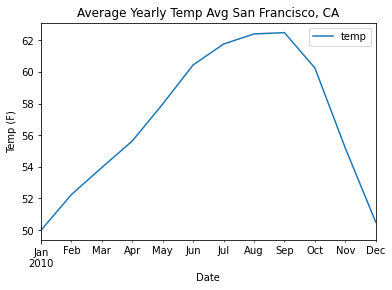

In [5]:
# 3rd Step: Visualize Data
df.plot()
plt.title("Average Yearly Temp Avg San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [6]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# 1st Step Sort Index
df = df.set_index('date').sort_index()
# Sorting by min_value ** Remove Reset Index in order to resample **
d = {'min':'min_value'}
df = df.groupby('date')['temp'].agg([min]).rename(columns=d)
# Resample by month
min_temp_df = df.resample('M').min()
min_temp_df.head()

,min_value
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4


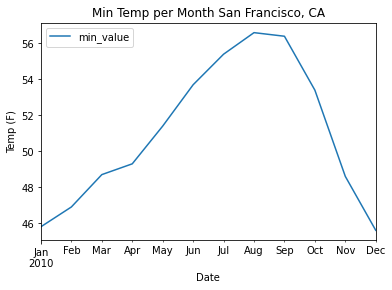

In [7]:
# Visualize Min Temps
min_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Min Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [8]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Sorting by max_value ** Remove Reset Index in order to resample **
d = {'max':'max_value'}
df = df.groupby('date')['temp'].agg([max]).rename(columns=d)
# Resample by month
max_temp_df = df.resample('M').max()
max_temp_df.head()

,max_value
date,
2010-01-31,56.2
2010-02-28,58.6
2010-03-31,61.3
2010-04-30,64.3
2010-05-31,66.4


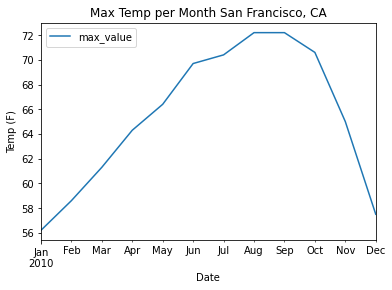

In [9]:
# Visualize Min Temps
max_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Max Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

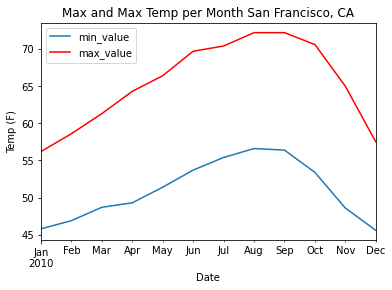

In [10]:
# Both Plots Together

ax = plt.gca()

min_temp_df.plot(ax=ax)
max_temp_df.plot(color='red', ax=ax)
plt.title("Max and Max Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

### 4. Which month is the coldest, on average?

In [11]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Resample
monthly_temps = df.resample('M')
#  Groupby date to fin min temp
coldest_month = monthly_temps.mean().idxmin()[0]
coldest_month = coldest_month.strftime('%B')
print(f'{coldest_month} was the coldest month on average in 2010.')

January was the coldest month on average in 2010.


### 5. Which month has the highest average temperature?

In [12]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Resample
monthly_temps = df.resample('M')
#  Groupby date to fin min temp
warmest_month = monthly_temps.mean().idxmax()[0]
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the warmest month on average in 2010.')

September was the warmest month on average in 2010.


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Resample for min/mad of Day
df = df.resample('D')['temp'].agg(['min', 'max'])
# Create variability Column
df['variability'] = (df['max'] - df['min'])
df.head()

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [14]:
# Resample
df = df.resample('M')['variability'].agg(['max'])
df

,max
date,
2010-01-31,9.3
2010-02-28,9.9
2010-03-31,12.0
2010-04-30,13.0
2010-05-31,13.1
2010-06-30,14.8
2010-07-31,14.8
2010-08-31,15.0
2010-09-30,14.9


In [15]:
# Print Answer
max_vari = df.idxmax()[0]
max_vari = max_vari.strftime('%B')
print(f'{max_vari} was found to demonstate the greatest monthly variability in 2010.')

August was found to demonstate the greatest monthly variability in 2010.


### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

***

# Part Two: Seattle

***

In [16]:
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

### 1. Which year and month combination has the highest amount of precipitation?

In [18]:
# 1st Step Sort Index
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
df = df.resample('M')['precipitation'].agg(['max']).idxmax()
df

max   2015-03-31
dtype: datetime64[ns]

### 2. Visualize the amount of monthly precipitation over time.

In [20]:
# Call in df
df = data.seattle_weather()
df.head()
# Sort Index
df = df.set_index('date').sort_index()
# Aggregate my month
df = df.resample('M')['precipitation'].agg(['sum'])
df.head()

,sum
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


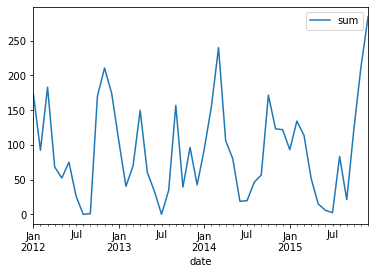

In [21]:
df.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [22]:
# Call in df
df = data.seattle_weather()
df.head()
# Sort Index
df = df.set_index('date').sort_index()
# Aggregate my month
df = df.resample('W')['wind'].agg(['sum'])
df.head()

,sum
date,
2012-01-01,4.7
2012-01-08,24.1
2012-01-15,23.6
2012-01-22,32.5
2012-01-29,27.0


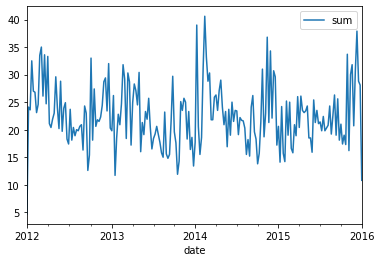

In [23]:
df.plot()

### 4. Which year-month combination is the windiest?

In [24]:
# Call in df
df = data.seattle_weather()
df.head()
# Sort Index
df = df.set_index('date').sort_index()
# Aggregate my month
df = df.resample('M')['wind'].agg(['max']).idxmax()
df

max   2012-12-31
dtype: datetime64[ns]

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [25]:
# Call in df
df = data.seattle_weather()
df.head()
# Sort Index
df = df.set_index('date').sort_index()

In [26]:
# Filter for sunny days
sun_bool = df['weather'] == 'sun'
df = df[sun_bool]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 714 entries, 2012-01-08 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  714 non-null    float64
 1   temp_max       714 non-null    float64
 2   temp_min       714 non-null    float64
 3   wind           714 non-null    float64
 4   weather        714 non-null    object 
dtypes: float64(4), object(1)
memory usage: 33.5+ KB


In [28]:
# Resample for Year count sun = max
df.resample('Y')['weather'].count().idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

### 6. In which month does it rain the most?

In [29]:
# Call in df
df = data.seattle_weather()
df.head()
# Sort Index
df = df.set_index('date').sort_index()
# Filter for sunny days
rain_bool = df['weather'] == 'rain'
df = df[rain_bool]
# Resample for month count rain = max
df.resample('M')['weather'].count().idxmax()

Timestamp('2012-11-30 00:00:00', freq='M')

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [30]:
# Call in df
df = data.seattle_weather()
df.head()
# Sort Index
df = df.set_index('date').sort_index()
# Filter for sunny days
precip_bool = df['precipitation'] != 0
df = df[precip_bool]
# Resample for month count rain = max
df.resample('M')['weather'].count().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

***

# Part Three: flights_20k

***

In [31]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [33]:
df.origin.value_counts()

PHX    1302
LAS    1243
HOU    1149
BWI     921
DAL     910
LAX     908
MDW     843
OAK     813
BNA     667
STL     635
SAN     585
MCI     558
SJC     504
SMF     471
ABQ     461
MSY     457
ONT     442
TPA     393
MCO     380
BUR     366
AUS     326
ELP     317
SAT     300
SEA     295
RNO     293
SLC     282
FLL     250
PDX     238
PVD     213
BHM     191
SDF     183
OKC     183
TUL     175
IND     173
CLE     172
JAX     170
ISP     164
DTW     155
BOI     144
RDU     135
SNA     122
LBB     109
LIT     109
OMA     109
GEG     106
MHT     103
BDL      99
MAF      96
TUS      93
CMH      86
HRL      81
ALB      79
JAN      75
SFO      73
PBI      67
BUF      65
AMA      63
IAH      53
CRP      45
Name: origin, dtype: int64

In [34]:
df.destination.value_counts()

PHX    1313
LAS    1221
HOU     992
DAL     963
MDW     913
LAX     906
OAK     890
BWI     853
BNA     640
STL     605
MCI     584
SAN     583
SJC     542
SMF     484
MSY     474
ABQ     438
ONT     417
MCO     409
TPA     403
BUR     354
AUS     342
SAT     321
ELP     300
SLC     297
RNO     291
SEA     274
BHM     241
FLL     234
PDX     220
TUL     203
PVD     181
JAX     172
OKC     169
IND     166
ISP     163
SDF     162
CLE     156
MHT     130
DTW     128
LBB     125
RDU     124
OMA     123
HRL     116
GEG     115
BOI     114
BDL     113
LIT     109
TUS     104
MAF     102
PBI      93
CMH      93
SNA      92
ALB      83
JAN      70
BUF      67
AMA      66
SFO      64
CRP      54
IAH      39
Name: destination, dtype: int64

In [35]:
df.columns

Index(['date', 'delay', 'distance', 'origin', 'destination'], dtype='object')

### 1. Convert any negative delays to 0.

In [36]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [37]:
# Convert negative delay to 0 (negative delay is early so not important here)
df['delay'] = df['delay'].clip(lower=0)
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### 2. Which hour of the day has the highest average delay?

In [38]:
# Call in df
df = data.flights_20k()
df.head()
# Sort Index
df = df.set_index('date').sort_index()
# Resample for hour count rain = max
df.resample('H')['delay'].agg(['max']).idxmax()

max   2001-02-09 13:00:00
dtype: datetime64[ns]

### 3. Does the day of the week make a difference in the delay amount?

In [41]:
# Call in df
df = data.flights_20k()
# Add a weekday column to make life easy
df['weekday'] = df.date.dt.day_name()
# Sort Index
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,-8,251,MDW,STL,Monday
2001-01-01 07:00:00,-10,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday


In [54]:
# Resample for hour count rain = max
df.groupby(['weekday']).sum()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

### 4. Does the month make a difference in the delay amount?

***

# Part Four: iowa_electricity (Bonus)

***

### 1. For each row, calculate the percentage of the year's total that energy source provided.

### 2. Lineplot of generation over time, color by source

### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

### 5. Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from
      each source?
    - express each number as a % of the year's total